# Function Transformation
Function transformation, in mathematics, refers to the process of modifying or altering a function to create a new function with specific properties or characteristics. These transformations are typically applied to the graph of a function, and they can change aspects such as its shape, position, or orientation.

In [68]:
import numpy as np
import pandas as pd

import scipy.stats as stats # This code will help in creatating QQ Plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [69]:
  df = pd.read_csv("/content/train (4).csv", usecols =['Age','Fare','Survived'])

In [70]:
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [71]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

Certainly! When dealing with missing values in the "Age" column, a smart approach is to replace these null values with the mean age. This strategy helps maintain the overall statistical characteristics of the data while ensuring that missing values are appropriately handled. By filling in the missing ages with the mean age, you can make the most of the available data for your analysis or modeling, creating a more robust and complete dataset.

In [72]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [73]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Now we will find the accuracy of the algorithim without using any Function Transformation.

In [75]:
#Plotting Probability Density Function (PDF) and Quantile-Quantile (QQ) Plot for better understanding

<ipython-input-76-11e05b32c7cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ plot')

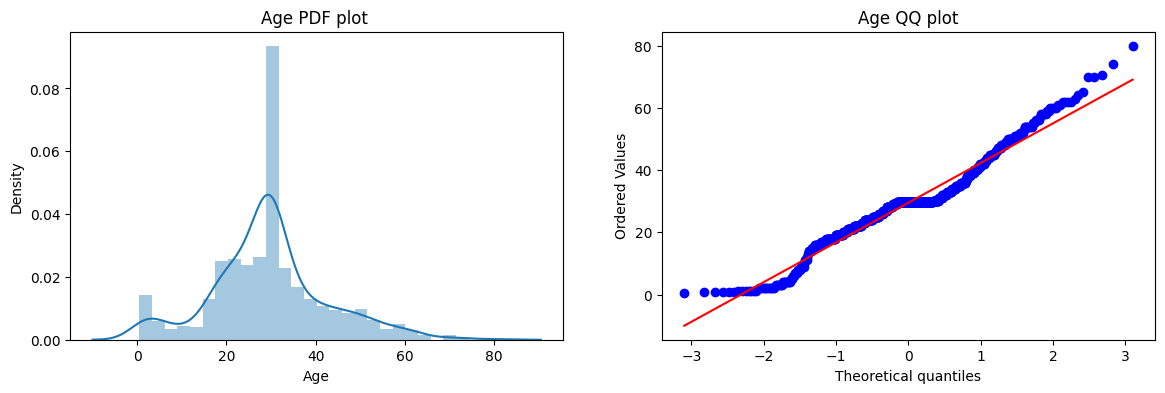

In [76]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF plot ')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

<ipython-input-77-e03e16329210>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ plot')

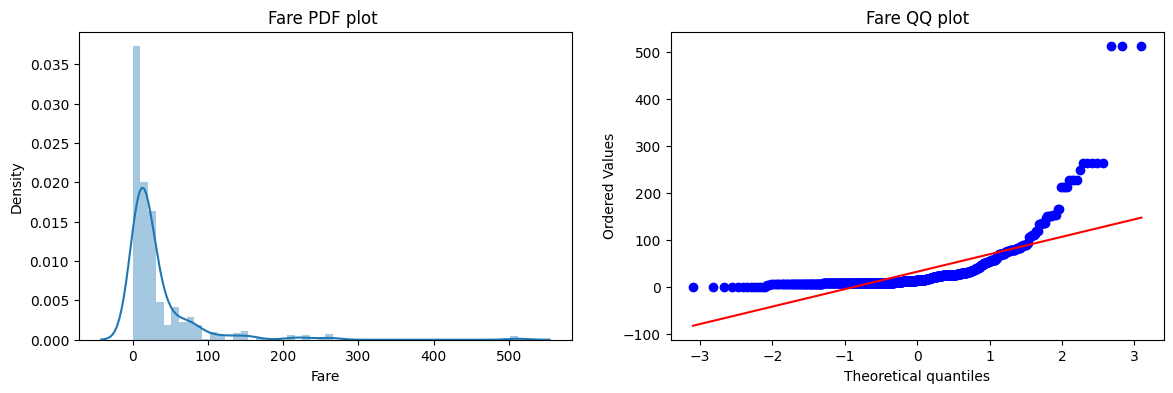

In [77]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF plot ')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

In [78]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [79]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [81]:
print('Accuracy of LR', accuracy_score(y_test, y_pred))
print('Accuracy of DT', accuracy_score(y_test, y_pred2))

Accuracy of LR 0.6480446927374302
Accuracy of DT 0.6759776536312849


# Using Function Transfomer

In [82]:
trf = FunctionTransformer(func = np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print('Accuracy of LR', accuracy_score(y_test,y_pred))
print('Accuracy of DT', accuracy_score(y_test,y_pred1))

Accuracy of LR 0.6815642458100558
Accuracy of DT 0.664804469273743


#### Here you can see the Accuracy score before function transformer was Accuracy of LogisticRegression 0.6480446927374302 & Accuracy of DecisionTree 0.659217877094972 were as after using function transformer the accuracy change to Accuracy of LogisticRegression 0.6815642458100558 Accuracy of DecisionTree  0.6759776536312849

In [83]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print('DT', np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6611111111111111


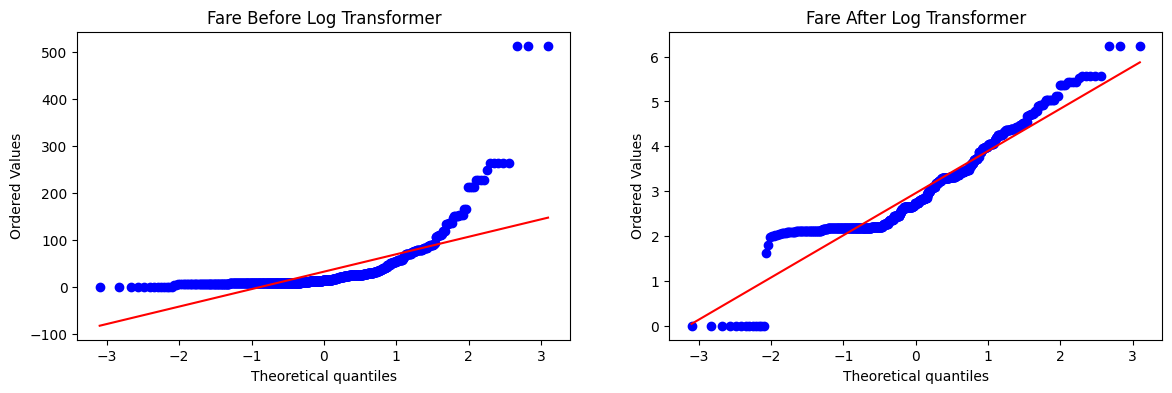

In [84]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log Transformer')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log Transformer')

plt.show()

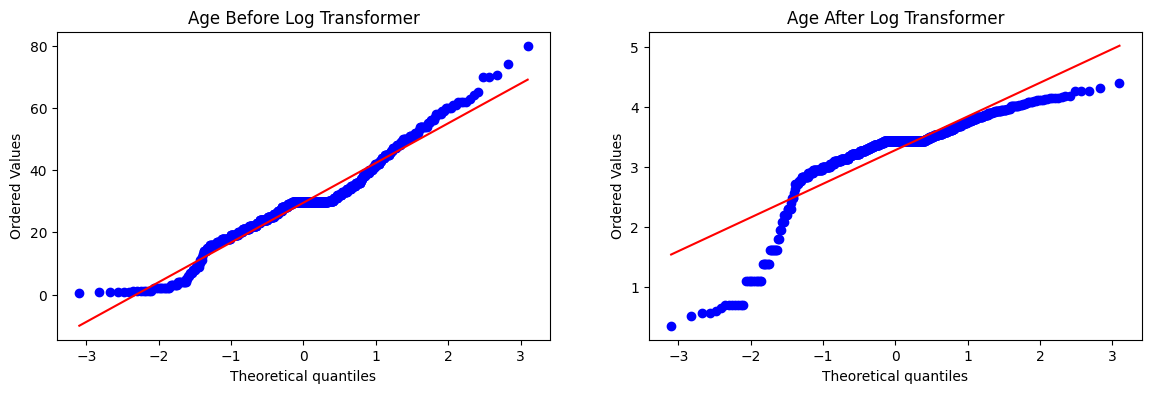

In [85]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log Transformer')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log Transformer')

plt.show()

Here result for Log Transformer on Age column is not as expected hence we will only apply Log Transformer on Fare column.

In [86]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2= clf2.predict(X_test_transformed)

print('Accuracy of LR', accuracy_score(y_test,y_pred))
print('Accuracy of DT', accuracy_score(y_test,y_pred2))

Accuracy of LR 0.4022346368715084
Accuracy of DT 0.4972067039106145


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [87]:
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print('DT', np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6510112359550563


In [97]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6442446941323345


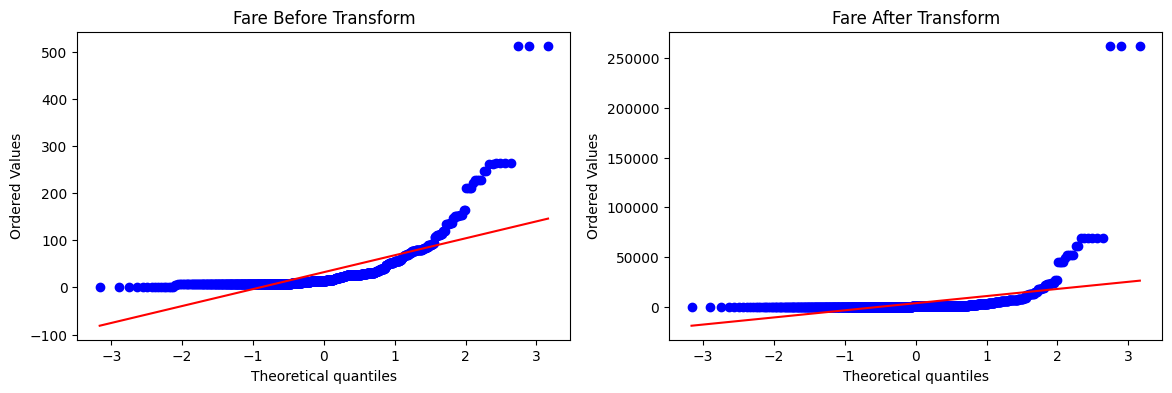

In [99]:
#Square Transfomer
apply_transform(lambda x:x**2)

Accuracy 0.6589013732833957


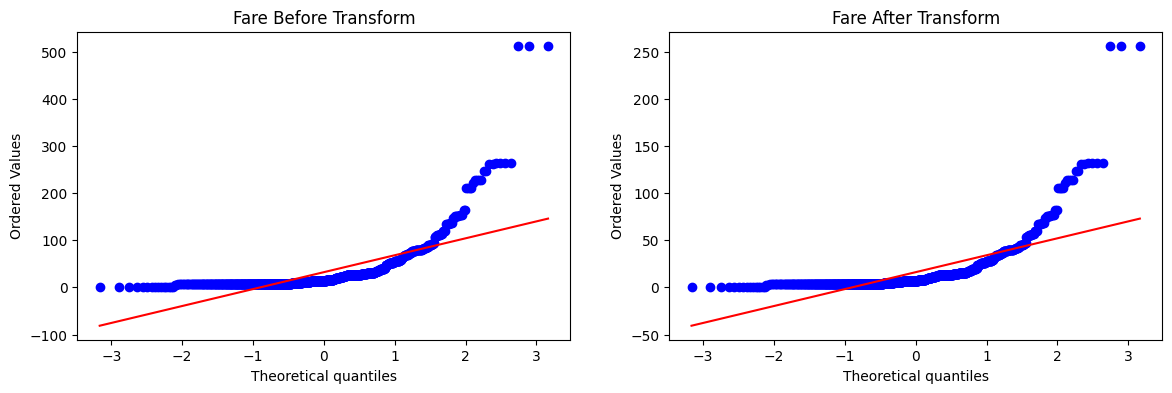

In [100]:
#Square Root Transfomer
apply_transform(lambda x:x*1/2)

Accuracy 0.61729088639201


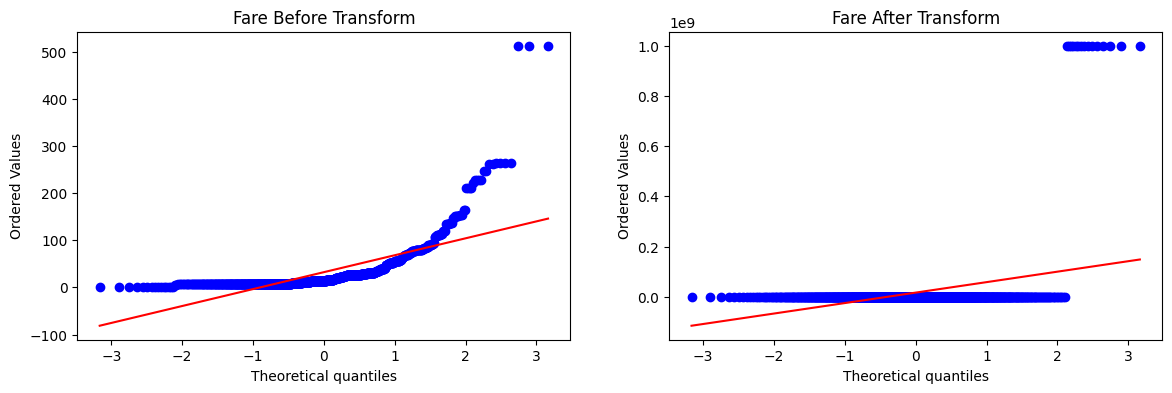

In [102]:
#Reciprocal Transfomer
apply_transform(lambda x:1/(x+0.000000001))